In [1]:
import json
import sys
import os
from pathlib import Path
import h5py

import numpy as np
import matplotlib.pyplot as plt
import torch

# Import model architecture.
CWD = os.path.join(Path().resolve())
data_dir = os.path.abspath(os.path.join(CWD, "../data"))
data_file = h5py.File(os.path.join(data_dir, "preprocessed_vocalization_dataset.h5"))

In [2]:
# Load SLEAP points, average over timebins
locs = np.mean(data_file["locations"], axis=1)

# Compute pairwise distances between SLEAP points.
from scipy.spatial.distance import pdist
pds = np.array([pdist(x, metric="euclidean") for x in locs])

In [3]:
# Assume 3% of the points are mislabeled outliers.
from sklearn.covariance import EllipticEnvelope
cov = EllipticEnvelope(contamination=0.03).fit(pds)

In [4]:
# Detect outliers and remove them
good_idx = np.argwhere(cov.predict(pds) > 0).ravel()
bad_idx = np.argwhere(cov.predict(pds) < 0).ravel()

Text(0.5, 1.0, 'Good datapoint')

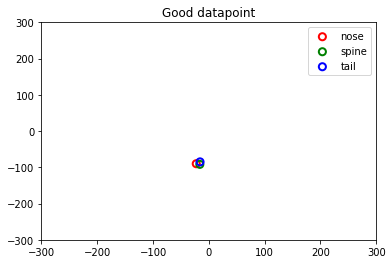

In [5]:
# Plot a random non-outlier datapoint
head, spine, tail = locs[np.random.choice(good_idx)]
plt.scatter(head[0], head[1], color="r", lw=2, facecolor="none", s=50, label="nose")
plt.scatter(spine[0], spine[1], color="g", lw=2, facecolor="none", s=50, label="spine")
plt.scatter(tail[0], tail[1], color="b", lw=2, facecolor="none", s=50, label="tail")
plt.xlim([-300, 300])
plt.ylim([-300, 300])
plt.legend()
plt.title("Good datapoint")

Text(0.5, 1.0, 'Bad datapoint')

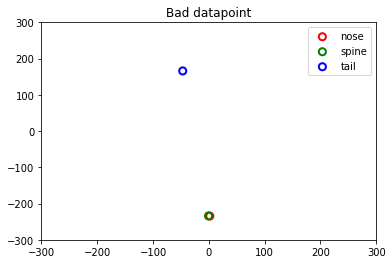

In [6]:
# Plot a random outliear datapoint
head, spine, tail = locs[np.random.choice(bad_idx)]
plt.scatter(head[0], head[1], color="r", lw=2, facecolor="none", s=50, label="nose")
plt.scatter(spine[0], spine[1], color="g", lw=2, facecolor="none", s=50, label="spine")
plt.scatter(tail[0], tail[1], color="b", lw=2, facecolor="none", s=50, label="tail")
plt.xlim([-300, 300])
plt.ylim([-300, 300])
plt.legend()
plt.title("Bad datapoint")

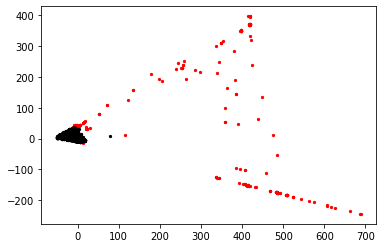

In [7]:
# Use PCA to visualize outliers (in red) vs. inliers (in black)
from sklearn.decomposition import PCA
x_, y_ = PCA(n_components=2).fit_transform(pds).T
plt.scatter(x_[bad_idx], y_[bad_idx], color="r", s=5)
plt.scatter(x_[good_idx], y_[good_idx], color="k", s=5)